<a href="https://colab.research.google.com/github/sanketpatel32/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
import zipfile

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


--2022-06-13 12:51:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   300MB/s    in 0.3s    

2022-06-13 12:51:30 (300 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



In [32]:
import pathlib
data_dir  =pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*") ]))
print(class_names)

['pizza' 'steak']


In [33]:
import random
import matplotlib.image as mpimg
import os
def veiw_random_image(target_dir , target_class):
    target_folder = target_dir + target_class 
    random_image = random.sample(os.listdir(target_folder)  ,1 )
    img = mpimg.imread(target_folder + "/" + random_image[0])
    print(random_image)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Shape : {img.shape}")
    return img / 255.


['1632774.jpg']
Shape : (512, 512, 3)


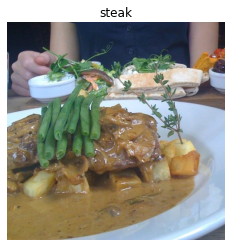

In [34]:
img = veiw_random_image(target_dir="pizza_steak/train/" , target_class="steak")

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data=train_data, validation_steps=len(valid_data))


# history_1  = model_1.fit(train_data , epochs= 5 , steps_per_epoch= len(train_data))


Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5667 - accuracy: 0.7073 - val_loss: 0.4582 - val_accuracy: 0.7773
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4417 - accuracy: 0.7953 - val_loss: 0.4645 - val_accuracy: 0.7891
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4246 - accuracy: 0.8213 - val_loss: 0.4109 - val_accuracy: 0.8262
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3666 - accuracy: 0.8527 - val_loss: 0.3475 - val_accuracy: 0.8555
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3249 - accuracy: 0.8707 - val_loss: 0.2833 - val_accuracy: 0.8984


In [29]:
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data=train_data, validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 0.0950 - accuracy: 0.9673 - val_loss: 0.1006 - val_accuracy: 0.9648
Epoch 2/5
47/47 [==============================] - 14s 292ms/step - loss: 0.0799 - accuracy: 0.9753 - val_loss: 0.0911 - val_accuracy: 0.9648
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.0645 - accuracy: 0.9747 - val_loss: 0.0988 - val_accuracy: 0.9551
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.0789 - accuracy: 0.9733 - val_loss: 0.0321 - val_accuracy: 0.9902
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.0269 - accuracy: 0.9953 - val_loss: 0.0191 - val_accuracy: 0.9980
